## Data Preprocessing

### 1. Reading data

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
from subprocess import check_output
import missingno as msno

data_dir = './zillow data/'
print(check_output(["ls", data_dir]).decode("utf8"))

merged_drop_new2016.csv
merged_drop_new2017.csv
properties_2016.csv
properties_2016_new.csv
properties_2017.csv
sample_submission.csv
train_2016_v2.csv
train_2017.csv
zillow_data_dictionary.xlsx



In [4]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
train_2016  = pd.read_csv('./zillow data/train_2016_v2.csv')
train_2017  = pd.read_csv('./zillow data/train_2017.csv')

In [6]:
properties_2016 = pd.read_csv('./zillow data/properties_2016.csv')
properties_2017 = pd.read_csv('./zillow data/properties_2017.csv')

In [9]:
zillow_dictionary = pd.read_excel('./zillow data/zillow_data_dictionary.xlsx')

In [19]:
submission = pd.read_csv('./zillow data/sample_submission.csv')

In [23]:
submission.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0,0,0,0,0,0
1,10759547,0,0,0,0,0,0
2,10843547,0,0,0,0,0,0
3,10859147,0,0,0,0,0,0
4,10879947,0,0,0,0,0,0


In [25]:
print ("Shape Of Train: ",train_2016.shape)
print ("Shape Of Properties: ",properties_2016.shape)
print("Shape Of Submission: ",submission.shape)

Shape Of Train:  (90275, 3)
Shape Of Properties:  (2985217, 58)
Shape Of Submission:  (2985217, 7)


In [28]:
train_2017.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [17]:
p0 = properties_2016['latitude']
p0 = p0[p0.isna()]
p0 = properties_2016.iloc[2973780:,1:]
for element in p0.columns.values:
    print(element, p0[p0[element].notna()].shape[0])

airconditioningtypeid 0
architecturalstyletypeid 0
basementsqft 0
bathroomcnt 0
bedroomcnt 0
buildingclasstypeid 0
buildingqualitytypeid 0
calculatedbathnbr 0
decktypeid 0
finishedfloor1squarefeet 0
calculatedfinishedsquarefeet 0
finishedsquarefeet12 0
finishedsquarefeet13 0
finishedsquarefeet15 0
finishedsquarefeet50 0
finishedsquarefeet6 0
fips 0
fireplacecnt 0
fullbathcnt 0
garagecarcnt 0
garagetotalsqft 0
hashottuborspa 0
heatingorsystemtypeid 0
latitude 0
longitude 0
lotsizesquarefeet 0
poolcnt 0
poolsizesum 0
pooltypeid10 0
pooltypeid2 0
pooltypeid7 0
propertycountylandusecode 0
propertylandusetypeid 0
propertyzoningdesc 0
rawcensustractandblock 0
regionidcity 0
regionidcounty 0
regionidneighborhood 0
regionidzip 0
roomcnt 0
storytypeid 0
threequarterbathnbr 0
typeconstructiontypeid 0
unitcnt 0
yardbuildingsqft17 0
yardbuildingsqft26 0
yearbuilt 0
numberofstories 0
fireplaceflag 0
structuretaxvaluedollarcnt 0
taxvaluedollarcnt 0
assessmentyear 0
landtaxvaluedollarcnt 0
taxamount 

In [18]:
p0 = properties_2017.iloc[2973780:,1:]
for element in p0.columns.values:
    print(element, p0[p0[element].notna()].shape[0])

airconditioningtypeid 1969
architecturalstyletypeid 24
basementsqft 0
bathroomcnt 8505
bedroomcnt 8505
buildingclasstypeid 5
buildingqualitytypeid 4535
calculatedbathnbr 8274
decktypeid 15
finishedfloor1squarefeet 147
calculatedfinishedsquarefeet 8352
finishedsquarefeet12 7855
finishedsquarefeet13 0
finishedsquarefeet15 383
finishedsquarefeet50 147
finishedsquarefeet6 114
fips 8505
fireplacecnt 949
fullbathcnt 8274
garagecarcnt 3584
garagetotalsqft 3584
hashottuborspa 226
heatingorsystemtypeid 4557
latitude 8505
longitude 8505
lotsizesquarefeet 7443
poolcnt 1296
poolsizesum 12
pooltypeid10 76
pooltypeid2 150
pooltypeid7 1145
propertycountylandusecode 8504
propertylandusetypeid 8505
propertyzoningdesc 4598
rawcensustractandblock 8505
regionidcity 8315
regionidcounty 8505
regionidneighborhood 2124
regionidzip 8501
roomcnt 8505
storytypeid 0
threequarterbathnbr 1356
typeconstructiontypeid 25
unitcnt 4656
yardbuildingsqft17 37
yardbuildingsqft26 1
yearbuilt 8349
numberofstories 2551
firepl

In [19]:
properties_2016 = properties_2016.iloc[0:2973780,:]

In [257]:
properties_2016.shape

(2973780, 58)

### Corelation Matrix

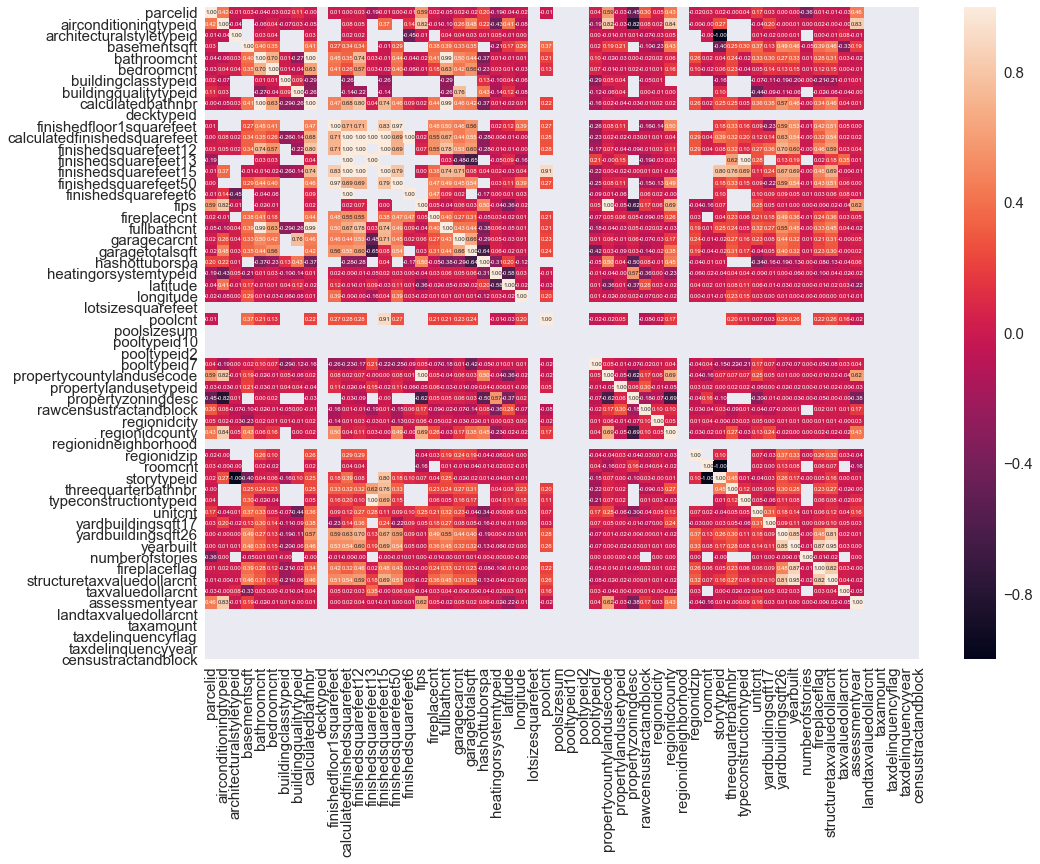

In [446]:
import seaborn as sns
cor_matrix1 = properties_2016.corr()
cols = properties_2016.columns.values
mask = np.zeros_like(cor_matrix1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,12))
sns.set(font_scale = 1.5)
hm = sns.heatmap(cor_matrix1, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':6},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr1.jpg')
plt.show()

### Merge training data with properties

### Visualize missing value of Properties

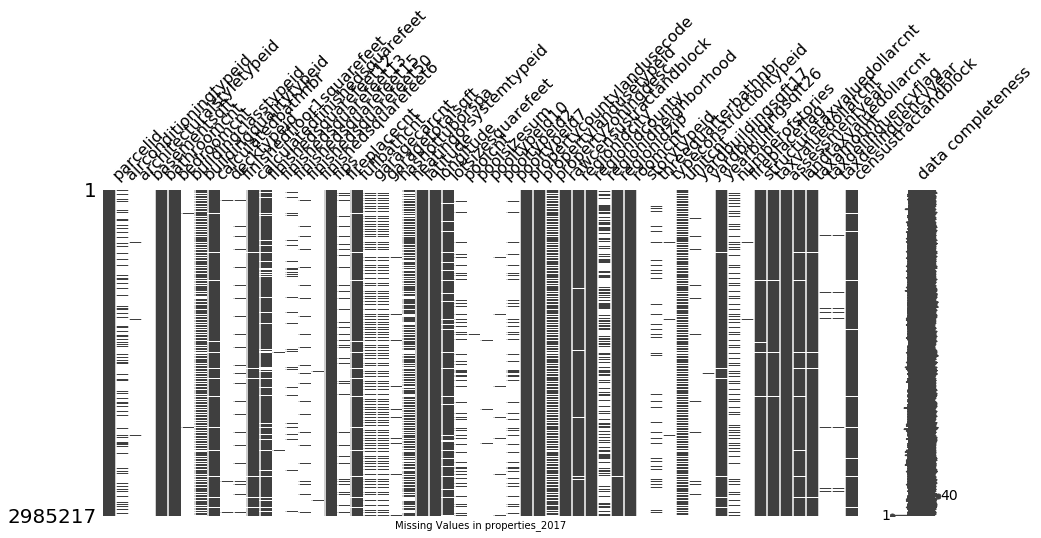

In [13]:
file = 'properties_2017'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

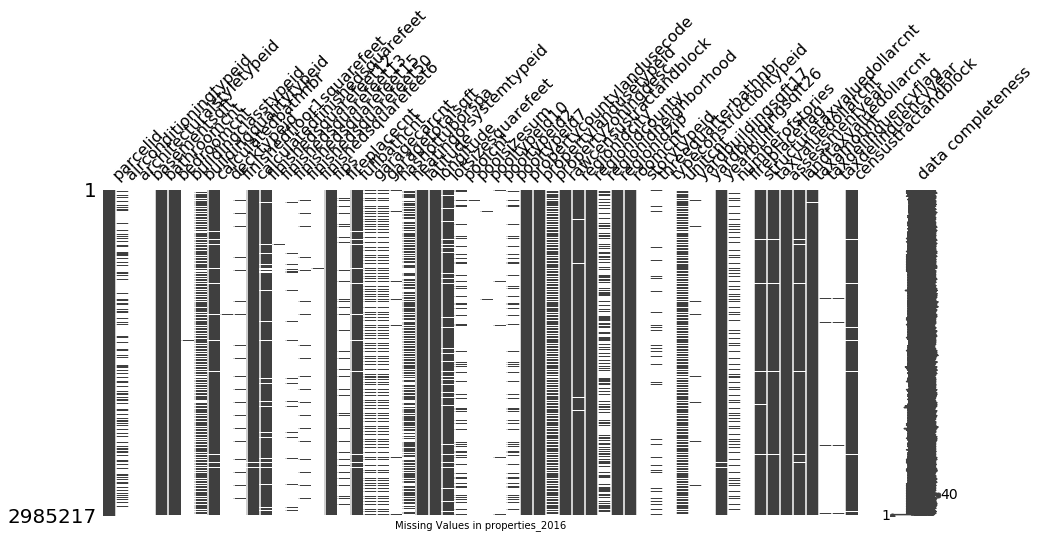

In [14]:
file = 'properties_2016'
msno.matrix(df=eval(file), figsize=(15,6),labels = True)
plt.xlabel('Missing Values in ' + file)
plt.show()

### Missing value ratios

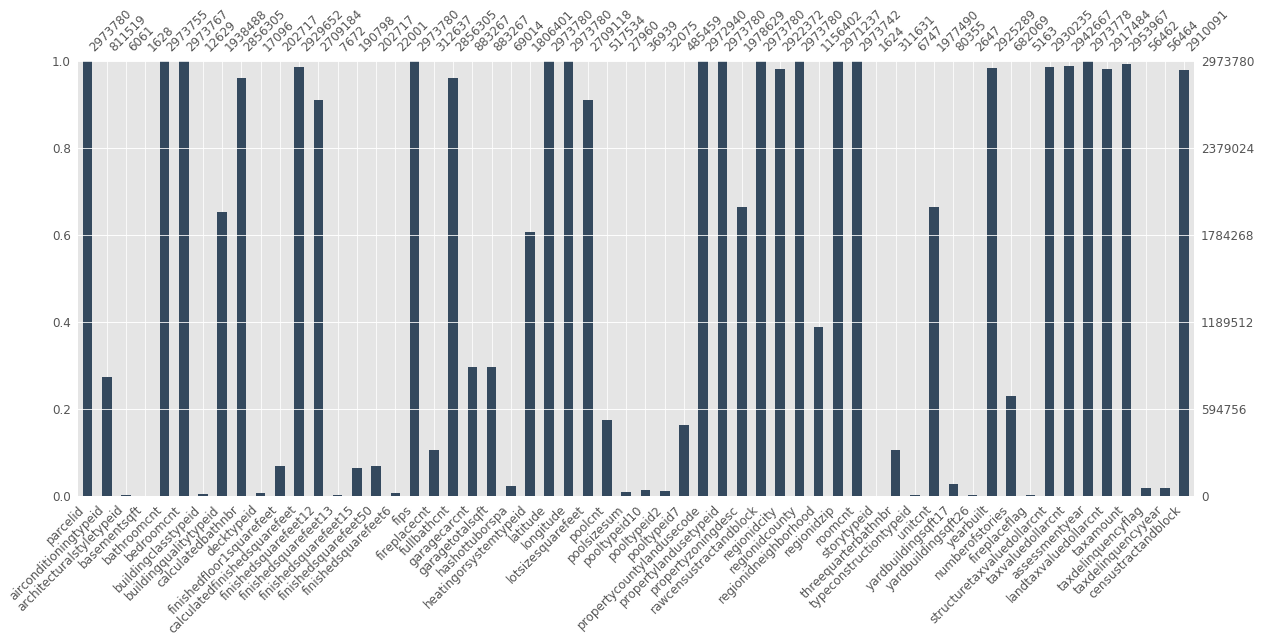

In [262]:
msno.bar(properties_2016,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

### Boxplot

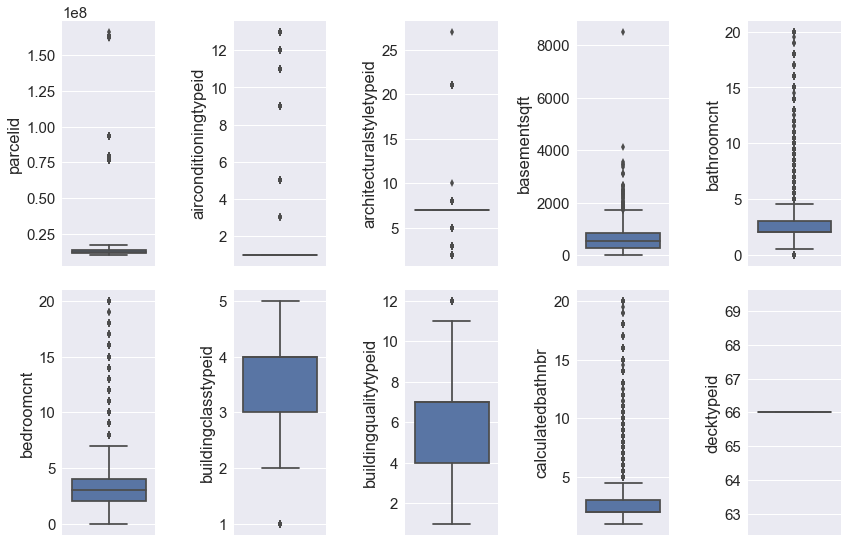

In [467]:
len(properties_2016.columns.values)
fig, axes = plt.subplots(2,5,figsize=(12,8))
for index in range(10):
    axes[int(index/5),int(index%5)] = sns.boxplot(y = properties_2016.iloc[:,index], orient= 'v',ax = axes[int(index/5),int(index%5)])


plt.tight_layout()
plt.show() 

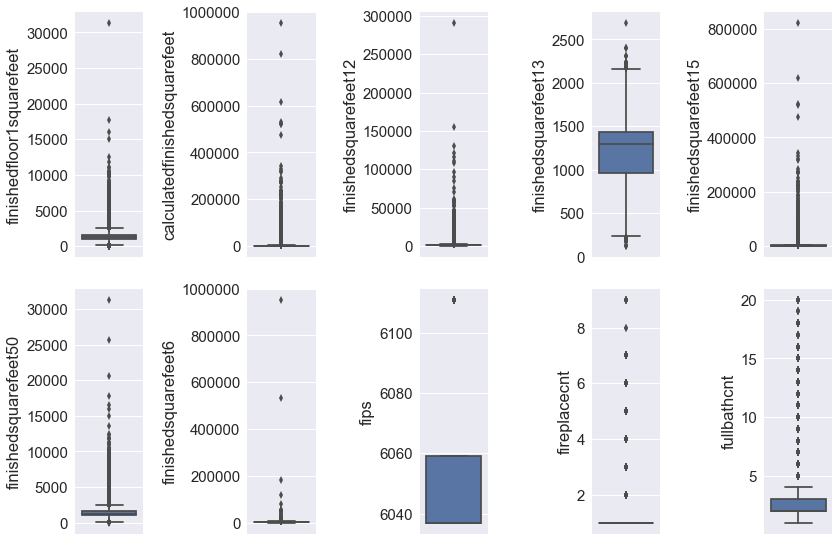

In [469]:
len(properties_2016.columns.values)
fig, axes = plt.subplots(2,5,figsize=(12,8))
for index in range(10):
    axes[int(index/5),int(index%5)] = sns.boxplot(y = properties_2016.iloc[:,index+10], orient= 'v',ax = axes[int(index/5),int(index%5)])


plt.tight_layout()
plt.show() 

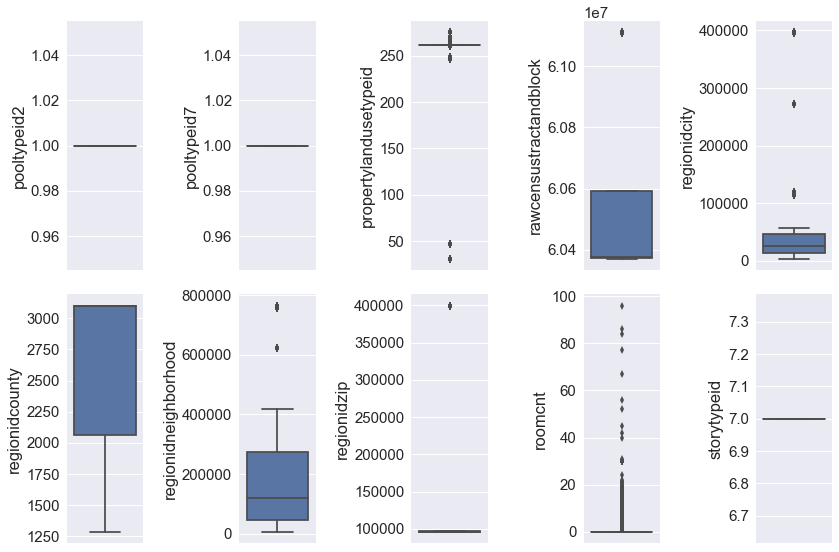

In [477]:
len(properties_2016.columns.values)
fig, axes = plt.subplots(2,5,figsize=(12,8))
for index,ele in enumerate([30,31,33,35,36,37,38,39,40,41]):
    axes[int(index/5),int(index%5)] = sns.boxplot(y = properties_2016.iloc[:,ele], orient= 'v',ax = axes[int(index/5),int(index%5)])


plt.tight_layout()
plt.show() 

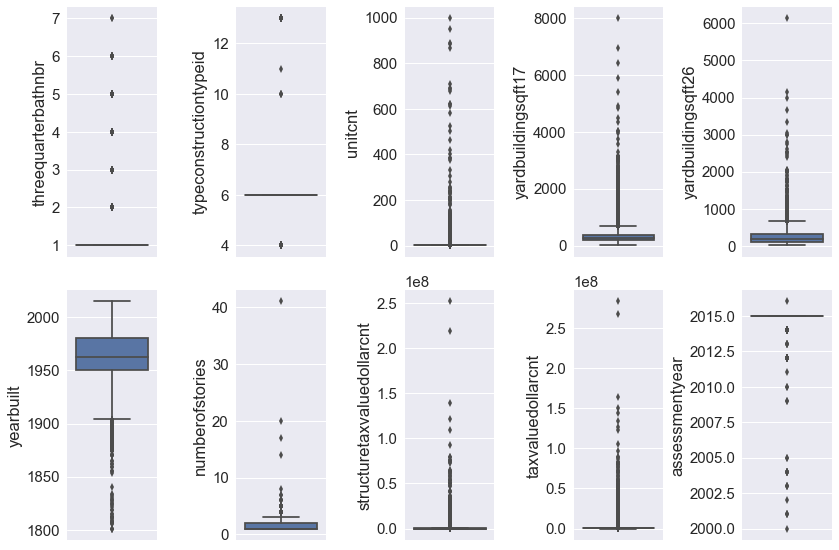

In [480]:
len(properties_2016.columns.values)
fig, axes = plt.subplots(2,5,figsize=(12,8))
for index,ele in enumerate([42,43,44,45,46,47,48,50,51,52]):
    axes[int(index/5),int(index%5)] = sns.boxplot(y = properties_2016.iloc[:,ele], orient= 'v',ax = axes[int(index/5),int(index%5)])


plt.tight_layout()
plt.show() 

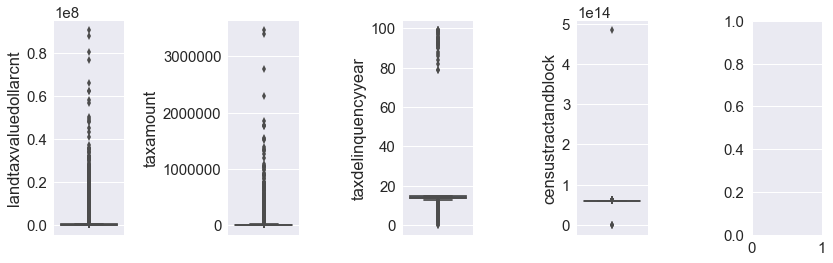

In [486]:
len(properties_2016.columns.values)
fig, axes = plt.subplots(1,5,figsize=(12,4))
for index,ele in enumerate([53,54,56,57]):
    axes[int(index%5)] = sns.boxplot(y = properties_2016.iloc[:,ele], orient= 'v',ax = axes[int(index%5)])


plt.tight_layout()
plt.show() 

### Feature1 airconditioningtypeid: Because most of aircondition type is 1(central type), so we drop this features

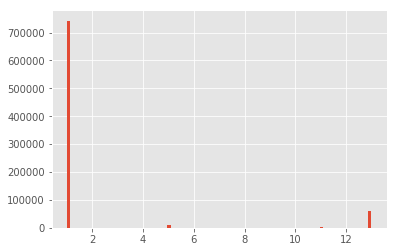

In [263]:
properties_2016['airconditioningtypeid'].hist(bins = 100)

In [264]:
properties_2016_new = properties_2016.drop('airconditioningtypeid', axis = 1)

### Feature2: architecturalstyletypeid: Most of architectural style type is missing, I guess most of people don't know what type of architectual style his or her house is, so they don't fill in any type, so this features is not useful for us, we just drop it.

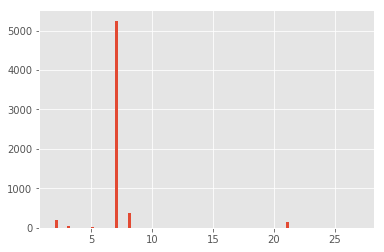

In [265]:
architecture = properties_2016['architecturalstyletypeid']
architecture.hist(bins = 100)
properties_2016_new = properties_2016_new.drop('architecturalstyletypeid', axis = 1)

### Feature3: Basement square area: most of house has no basement, so this feature we just drop it

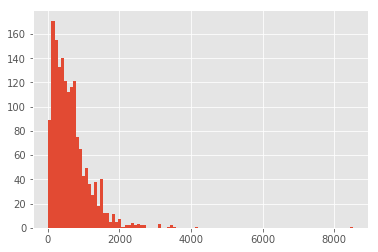

In [266]:
properties_2016['basementsqft'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('basementsqft', axis = 1)

### Feature4, 5: bedroomcnt / bathroomcnt: because the distribution of data is around normal, we use mode to replace missing value

2.2091427336818263
0    2.0
dtype: float64
3.088948797938776
0    3.0
dtype: float64


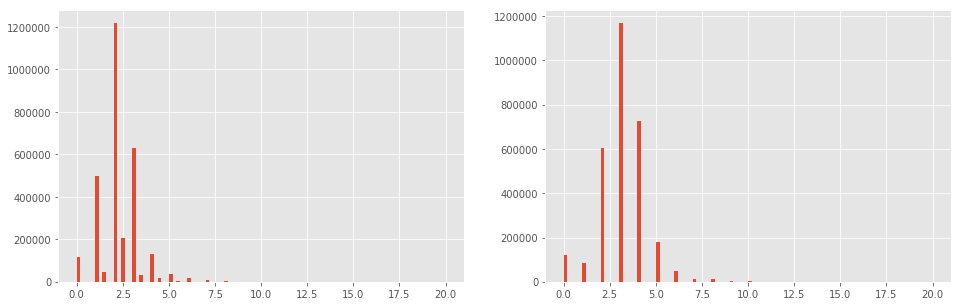

In [267]:
fig,axes = plt.subplots(1,2, figsize = (16,5))
axes[0] = properties_2016_new['bathroomcnt'].hist(bins = 100, ax = axes[0])
axes[1] = properties_2016_new['bedroomcnt'].hist(bins = 100)
print(properties_2016_new['bathroomcnt'].mean())
print(properties_2016_new['bathroomcnt'].mode())
print(properties_2016_new['bedroomcnt'].mean())
print(properties_2016_new['bedroomcnt'].mode())

In [269]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_new = imp.fit_transform(properties_2016_new['bathroomcnt'].values.reshape(-1,1))
properties_2016_new['bathroomcnt'] = X_new
X_new = imp.fit_transform(properties_2016_new['bedroomcnt'].values.reshape(-1,1))
properties_2016_new['bedroomcnt'] = X_new

### Feature 6: bulidingclasstypeid: Most of value missing so we just drop this columns

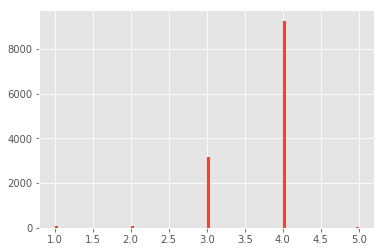

In [270]:
properties_2016['buildingclasstypeid'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('buildingclasstypeid', axis = 1)

### *Feature7: buildqualitytypeid: we can assign missing value as another type, because the number of missing data and not missing data are almost same

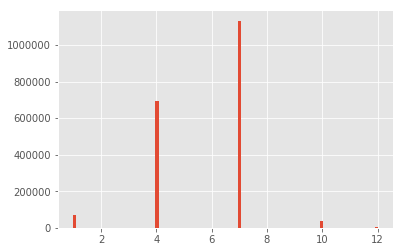

In [271]:
properties_2016_new['buildingqualitytypeid'].hist(bins = 100)

In [288]:
print(properties_2016_new['buildingqualitytypeid'].unique())
p1 = properties_2016_new['buildingqualitytypeid']
p1 = p1.fillna(0.0)
p1[p1.isna()].shape[0]
properties_2016_new['buildingqualitytypeid'] = p1

[nan  7.  4. 10.  1. 12.  8.  3.  6.  9.  5. 11.  2.]


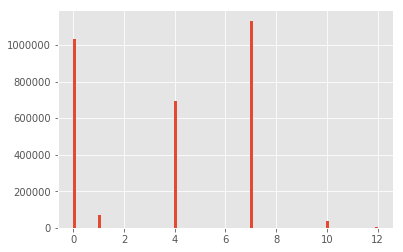

In [291]:
properties_2016_new['buildingqualitytypeid'].hist(bins = 100)

### Feature 8: calculatedbathnbr: this feature is duplicated with bathroomcnt, so we drop this feature

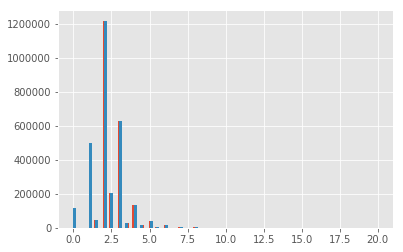

In [292]:
properties_2016_new['calculatedbathnbr'].hist(bins = 100)
properties_2016_new['bathroomcnt'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('calculatedbathnbr', axis = 1)

### Feature 9: decktypeid most of data missing so we just delete this feature

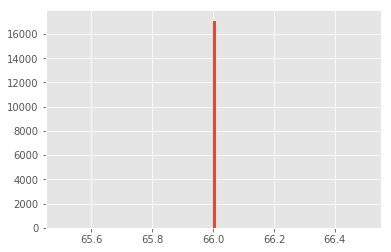

In [293]:
properties_2016_new['decktypeid'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('decktypeid', axis = 1)

### *Feature 10,15: finishedfloor1squarefeet and finishedsquarefeet50: this two feature is same, we drop one of them

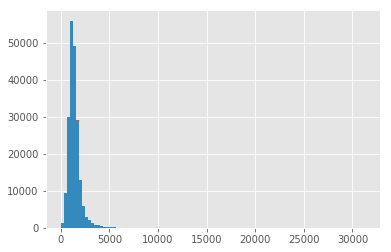

In [294]:
properties_2016_new['finishedfloor1squarefeet'].hist(bins = 100)
properties_2016_new['finishedsquarefeet50'].hist(bins = 100)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet50', axis = 1)

### *Feature 11, 12, 13, 14, 16: calculatedfinishedsquarefeet = all other features, so we drop all of them

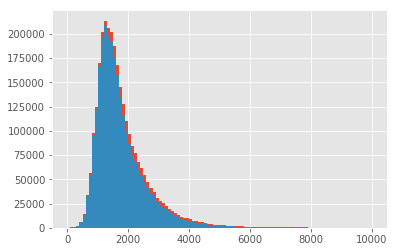

In [151]:
p1 = properties_2016_new['calculatedfinishedsquarefeet']
p2 = properties_2016_new['finishedsquarefeet12']
p1[p1<10000].hist(bins=100)
p2[p2<10000].hist(bins=100)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet12', axis = 1)

In [304]:
p0 = properties_2016_new['calculatedfinishedsquarefeet']

p1 = properties_2016_new['finishedsquarefeet6']
p2 = properties_2016_new['finishedsquarefeet12']
p3 = properties_2016_new['finishedsquarefeet13']
p4 = properties_2016_new['finishedsquarefeet15']
p6 = properties_2016_new['finishedfloor1squarefeet']

In [307]:
print(p0[p0.isna()].shape[0])

44128


In [300]:
p1 = p1[p1.notna()]
p2 = p2[p2.notna()]
p3 = p3[p3.notna()]
p4 = p4[p4.notna()]
p6 = p6[p6.notna()]

p0 = p0[p0.notna()]

In [301]:
print(p0.shape[0])
print(p1.shape[0]+p2.shape[0]+p3.shape[0]+p4.shape[0])

2929652
2929655


In [302]:
print(p1.shape[0],p2.shape[0],p3.shape[0],p4.shape[0], p5.shape[0],p6.shape[0])

22001 2709184 7672 190798 202717 202717


In [315]:
print(p0.mean())
print(p0[p0<8000].mean())
p0.mode()[0]

1821.4170147085526
1786.717346113617


1440.0

In [323]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
X_new = imp.fit_transform(properties_2016_new['calculatedfinishedsquarefeet'].values.reshape(-1,1))
properties_2016_new['calculatedfinishedsquarefeet'] = X_new

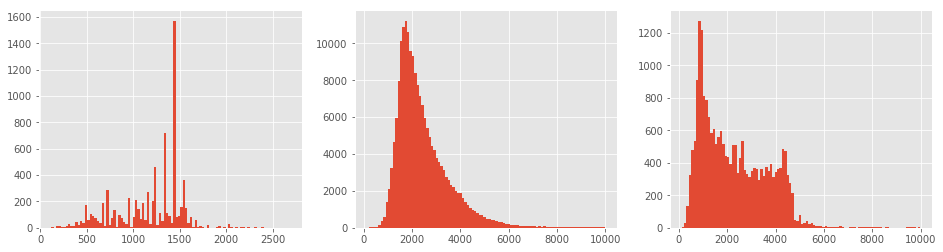

In [330]:
fig, axes = plt.subplots(1,3,figsize = (16,4))
properties_2016_new['finishedsquarefeet13'].hist(bins = 100, ax = axes[0])
p1 = properties_2016_new['finishedsquarefeet15']
p1[p1<10000].hist(bins = 100, ax = axes[1])
p2 = properties_2016_new['finishedsquarefeet6']
p2[p2<10000].hist(bins = 100, ax = axes[2])

In [331]:
properties_2016_new = properties_2016_new.drop('finishedsquarefeet13', axis = 1)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet15', axis = 1)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet6', axis = 1)

### Feauture 17: fips: maybe we can use location to determine which county they belong to, no missing value

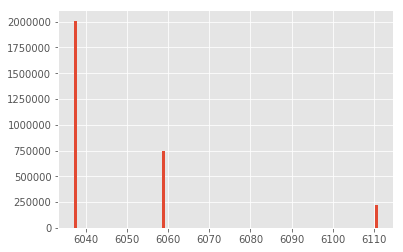

In [332]:
properties_2016_new['fips'].hist(bins = 100)

In [333]:
print(properties_2016_new['fips'].shape[0] - properties_2016_new['fips'][properties_2016_new['fips'].notna()].shape[0])

0


### *Feature 18,50: fireplace cnt and flag: we drop flag

In [334]:
p1 = properties_2016_new['fireplaceflag']
p2 = properties_2016_new['fireplacecnt']
print(p1.unique())
print(p2.unique())

[nan True]
[nan  3.  1.  2.  4.  9.  5.  7.  6.  8.]


In [335]:
print(p1[p1.notna()].shape[0])
print(p2[p2.notna()].shape[0])

5163
312637


In [336]:
properties_2016_new = properties_2016_new.drop('fireplaceflag',axis = 1)

### Feature 19,43: fullbathcnt, threequarterbathcnt 

In [337]:
p1 = properties_2016_new['fullbathcnt']
p2 = properties_2016_new['threequarterbathnbr']
p3 = properties_2016_new['bathroomcnt']
print(p1.unique())
print(p2.unique())
print(p3.unique())

[nan  2.  4.  3.  1.  5.  7.  6. 10.  8.  9. 12. 11. 13. 14. 20. 19. 15.
 18. 16. 17.]
[nan  1.  2.  4.  3.  6.  5.  7.]
[ 0.    2.    4.    3.    1.    2.5   3.5   5.    1.5   4.5   7.5   5.5
  6.    7.   10.    8.    9.   12.   11.    8.5   6.5  13.    9.5  14.
 20.   19.5  15.   10.5  18.   16.    1.75 17.   19.    0.5  12.5  11.5
 14.5 ]


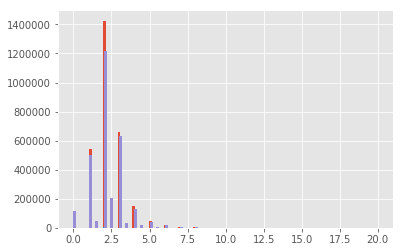

In [340]:
p1.hist(bins =100)
p2.hist(bins = 100)
p3.hist(bins = 100)

### Feature20,21: garage car cnt / area:

### Feature 23: HeatsystemID, we just assign missing value as another type 0

In [342]:
p1 = properties_2016_new['heatingorsystemtypeid']
p1.unique()

array([nan,  2.,  7., 20.,  6., 13., 18., 24., 12., 10.,  1., 14., 21.,
       11., 19.])

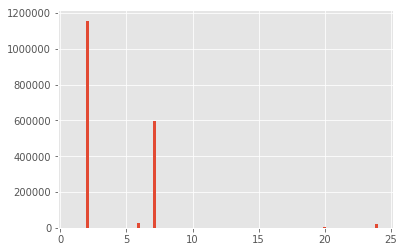

In [343]:
p1.hist(bins = 100)

In [344]:
print(properties_2016_new['heatingorsystemtypeid'].unique())
p1 = properties_2016_new['heatingorsystemtypeid']
p1 = p1.fillna(0.0)
p1[p1.isna()].shape[0]
properties_2016_new['buildingqualitytypeid'] = p1

[nan  2.  7. 20.  6. 13. 18. 24. 12. 10.  1. 14. 21. 11. 19.]


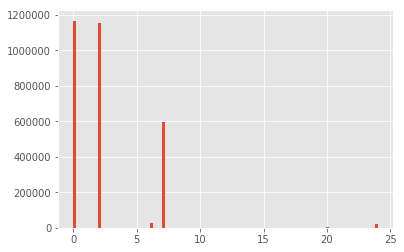

In [346]:
p1.hist(bins = 100)

### Feature 24,25: latitude, longitude, no missing value

In [230]:
p1 = properties_2016_new['latitude']
p2 = properties_2016_new['longitude']
p3 = properties_2016_new['regionidcounty']
print(p1.shape[0] - p1[p1.notna()].shape[0])
print(p2.shape[0] - p2[p2.notna()].shape[0])
print(p3.shape[0] - p3[p3.notna()].shape[0])

11437
11437
11437


In [233]:
p1 = merged_2016['latitude']
p2 = merged_2016['longitude']
p3 = merged_2016['regionidcounty']
print(p1.shape[0] - p1[p1.notna()].shape[0])
print(p2.shape[0] - p2[p2.notna()].shape[0])
print(p3.shape[0] - p3[p3.notna()].shape[0])

0
0
0


### Feature 26: lotsize

### *Feauture  22,27,28,29,30,31: pool cnt/ type

In [348]:
properties_2016_new['poolcnt'].unique()

array([nan,  1.])

##### this feature has 1 pool or no pool, so we can assign missing value with 0 to denote no pool

In [370]:
p0 = properties_2016_new['pooltypeid10']
p1 = properties_2016_new['pooltypeid2']
p2 = properties_2016_new['hashottuborspa']
p3 = properties_2016_new['pooltypeid7']

In [352]:
p0[p0.notna()].shape[0] + p1[p1.notna()].shape[0]

69014

In [353]:
p2[p2.notna()].shape[0]

69014

In [356]:
print(p2.unique())
print(p0.unique())
print(p1.unique())
print(p3.unique())

[nan True]
[nan  1.]
[nan  1.]
[nan  1.]


##### hashottuborspa  = pooltype10 + pooltype2, so we can drop hashottuborspa

In [366]:
properties_2016_new = properties_2016_new.drop('hashottuborspa',axis = 1)
properties_2016_new = properties_2016_new.drop('poolsizesum',axis = 1)

In [371]:
p4 = properties_2016_new['poolcnt']
print(p4[p4.notna()].shape[0])
p5 = properties_2016_new['poolsizesum']

517534


In [360]:
p1[p1.notna()].shape[0] + p3[p3.notna()].shape[0]

517534

##### poolcnt = pooltype2 + pooltype7, so we combine feature pooltype 2,7,10, and assign missing data with 0, denote no pool? or we just assign no pool wih 0 , has pool with 1?

In [372]:
p4 = p4.fillna(0)
p0 = p0.fillna(0)
p1 = p1.fillna(0)
p3 = p3.fillna(0)

In [373]:
p_new = p0+p4
p_new.unique()

array([0., 1.])

In [374]:
properties_2016_new['haspoolornot'] = p_new

In [375]:
properties_2016_new = properties_2016_new.drop('poolcnt',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid2',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid7',axis = 1)
properties_2016_new = properties_2016_new.drop('pooltypeid10',axis = 1)

### Feature32,33,34: properties county land use code, id and description

In [376]:
properties_2016_new['propertycountylandusecode'].unique()

array(['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200',
       '010C', '0300', '1204', '100V', '01HC', '120C', '040V', '1214',
       '0101', nan, '070P', '0700', '1', '128', '0', '1112', '5050',
       '1110', '1118', '010E', '1111', '1129', '1420', '1222', '1128',
       '1310', '1117', '1333', '1116', '1410', '0104', '070D', '0108',
       '012C', '0400', '0103', '01DC', '0201', '010M', '030V', '0110',
       '010F', '010G', '010H', '0301', '0102', '020E', '020M', '0401',
       '0113', '0141', '122', '38', '135', '96', '71', '73', '34', '0209',
       '040G', '010L', '012E', '0111', '1720', '1014', '012D', '1213',
       '1201', '1321', '1444', '1421', '0140', '0123', '0133', '020G',
       '030G', '105', '0204', '010T', '0120', '1202', '121G', '010X',
       '020V', '880V', '1120', '0130', '0118', '01HE', '120G', '5060',
       '0131', '0203', '011C', '1215', '1212', '040D', '120T', '0420',
       '8', '1203', '070X', '0114', '030E', '121T', '1012', '121C',
       '

In [379]:
properties_2016_new['propertyzoningdesc'].unique()

array([nan, 'LCA11*', 'LAC2', ..., 'WCR1400000', 'EMPYYY', 'RMM2*'],
      dtype=object)

In [380]:
properties_2016_new['propertylandusetypeid'].unique()

array([269., 261.,  47.,  31., 260., 266., 246., 247., 248., 263., 265.,
       275., 267., 264., 270.])

In [386]:
p1 = properties_2016_new[['propertycountylandusecode','propertylandusetypeid']]

In [388]:
p1.head()

,propertycountylandusecode,propertylandusetypeid
0,010D,269.0
1,0109,261.0
2,1200,47.0
3,1200,47.0
4,1210,31.0


##### land use code and typeid is duplicated, so we can drop use code and description

In [390]:
properties_2016_new = properties_2016_new.drop('propertycountylandusecode',axis = 1)
properties_2016_new = properties_2016_new.drop('propertyzoningdesc',axis = 1)

### *Feature35,36: census block

In [403]:
properties_2016_new['rawcensustractandblock'].mode()

0    6.059052e+07
dtype: float64

In [402]:
properties_2016_new['censustractandblock'].mode()

0    6.037920e+13
dtype: float64

### Feature37,38,39,40: regionid

In [404]:
properties_2016_new['regionidcounty'].unique()

array([3101., 1286., 2061.])

In [416]:
properties_2016_new['regionidcity'].unique().shape

(187,)

In [411]:
properties_2016_new['regionidzip'].unique().shape

(406,)

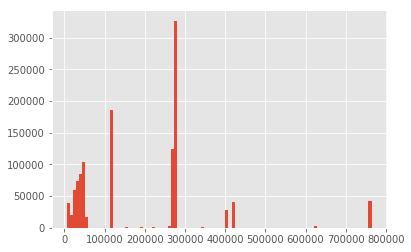

In [417]:
properties_2016_new['regionidneighborhood'].hist(bins = 100)

### Feature41,45: room cnt, unit cnt

### Feature42,44: story type, construction type: too many missing value just drop them

In [414]:
properties_2016_new = properties_2016_new.drop('storytypeid',axis = 1)
properties_2016_new = properties_2016_new.drop('typeconstructiontypeid',axis = 1)

In [419]:
properties_2016_new = properties_2016_new.drop('yardbuildingsqft17',axis = 1)
properties_2016_new = properties_2016_new.drop('yardbuildingsqft26',axis = 1)

### Summary

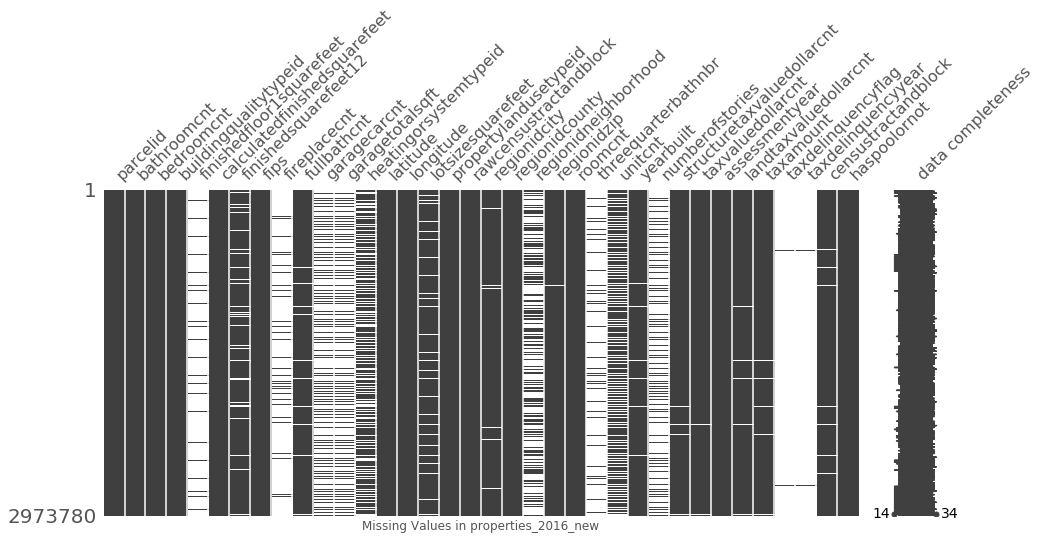

In [420]:
file = 'properties_2016_new'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

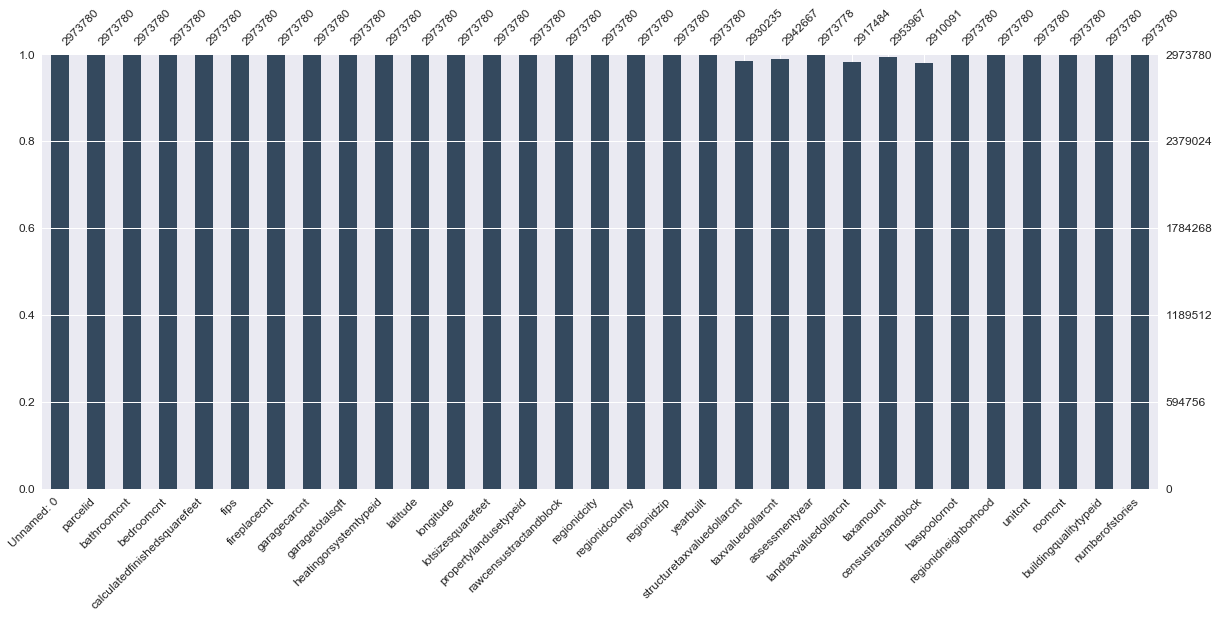

In [288]:
msno.bar(properties_2016_new,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

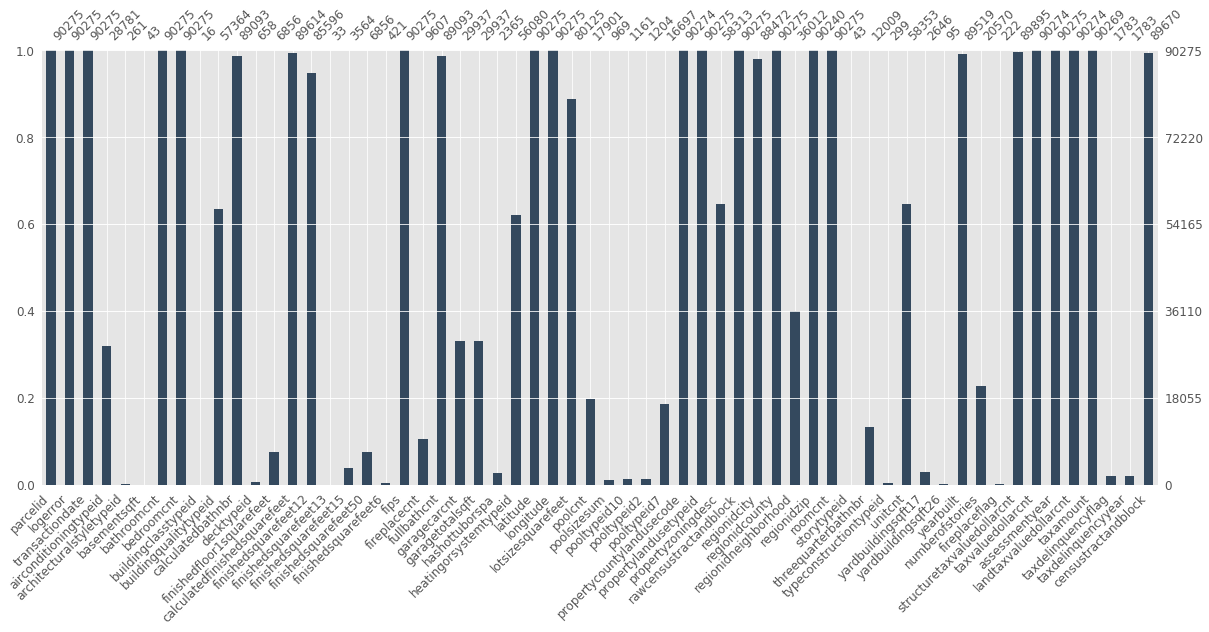

In [21]:
msno.bar(merged_2016,figsize=(20,8),color="#34495e",fontsize=12,labels=True)

In [7]:
properties_2016_new = pd.read_csv('./zillow data/properties_2016_new.csv')

#### ROOMCNT: Most of the room count is 0, we think it does't make sense, but we first doesn't regard it as error values

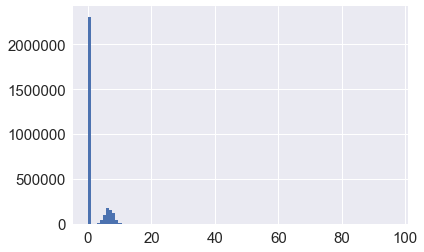

In [42]:
properties_2016['roomcnt'].hist(bins = 100)

In [45]:
p1 = properties_2016['bedroomcnt']+ properties_2016['bathroomcnt']
p1.mean()

5.298080120924555

#### FIREPLACECNT: we use 0 to firepleace count replace  it --- 0.0 ---  assume them has no fireplace

In [73]:
p1 = properties_2016['fireplacecnt']
p1[p1.isna()] = 0.0
properties_2016_new.drop('fireplacecnt',axis = 1)
properties_2016_new['fireplacecnt'] = p1

#### Garage cnt and area ：we assume the missing value is the house without garage, so assign missing value as 0

In [65]:
p1 = properties_2016_new['garagecarcnt']
p1[p1.isna()] = 0.0
properties_2016_new['garagecarcnt'] = p1

In [66]:
p1 = properties_2016_new['garagetotalsqft']
p1[p1.isna()] = 0.0
properties_2016_new['garagetotalsqft'] = p1

#### Heating or system: it seems that the missing value is that the owner of house don't know what heating system their house use, so we assume its 2, central

In [75]:
p1 = properties_2016_new['heatingorsystemtypeid']
p1[p1.isna()] = 2
properties_2016_new['heatingorsystemtypeid'] = p1

#### lot area ---  replace with mean

In [296]:
p1 = properties_2016_new['lotsizesquarefeet']
p1[p1.isna()] = p1.mean()
properties_2016_new['lotsizesquarefeet'] = p1

### Using KNN to restore geo data

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import KFold

def KNN_train(X_train, y_train, X_test):

    # using cross-validation finding optimal parameters
    estimator = KNeighborsClassifier()
    k = np.linspace(1,100,100)
    tuned_parameters = [{'n_neighbors': k}]
    n_folds = 5
    knn = GridSearchCV(estimator, tuned_parameters, cv= KFold(n_folds), scoring= 'accuracy')
    knn.fit(X_train,y_train)
    print(clf.best_params_ , clf.best_score_)

In [292]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def KNN_performance(train_feature_list, target_feature,k_list = [1,2,3,4,5,6,7,8,9,10,20,50,100], model = 'class'):
    
    location = properties_2016_new[train_feature_list]
    target = properties_2016_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values

    X_train = location.loc[index_notna,:].values
    y_train = target.loc[index_notna].values
    X_test = location.loc[index_na,:].values

    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
    for k in k_list:
        #KNN_train(X_train,y_train,X_test)
        if model == 'class':
            knn= KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train,y_train)
            y_pred = knn.predict(X_test)
            print(k,accuracy_score(y_test,y_pred))
        if model == 'reg':
            knn= KNeighborsRegressor(n_neighbors=k)
            knn.fit(X_train,y_train)
            y_pred = knn.predict(X_test)
        
            print(k,mean_squared_error(y_test,y_pred)/target.mean())
        
def KNN_train(k,train_feature_list, target_feature, model = 'class'):
    location = properties_2016_new[train_feature_list]
    target = properties_2016_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values

    X_train = location.loc[index_notna,:].values
    y_train = target.loc[index_notna].values
    X_test = location.loc[index_na,:].values
    
    print('begin train ......')
    if model == 'class':
        knn= KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
    if model == 'reg':
        knn= KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred = knn.predict(X_test)
    print('successful')
    return y_pred

def merge_result(target_feature, y_pred):
    target = properties_2016_new[target_feature]
    index_na = target[target.isna()].index.values
    index_notna = target[target.notna()].index.values
    p1 = target.loc[index_na]
    p2 = pd.Series(y_pred, index=p1.index.values)
    p3 = target[target.notna()]
    p2 = p2.append(p3)
    p2 = p2.sort_index(axis = 0)
    properties_2016_new[target_feature] = p2
    print('successfully done.')
  

#### Region neigborhood, city, zip

In [236]:
target_feature = 'regionidcity'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.9973682655127682
2 0.9967305520731908
3 0.9971971716631255
4 0.9966278957634052
5 0.9968456515720414
6 0.9965024269403339
7 0.9966797423845091
8 0.996369699590308
9 0.9964319155356326
10 0.9961322420656523
20 0.9949553237665948
50 0.9922395977531748
100 0.9890769538658396


In [243]:
y_pred = KNN_train(1,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

In [259]:
target_feature = 'regionidzip'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(1,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


#### unitcnt and roomcnt, number of stories

In [263]:
properties_2016_new = properties_2016_new.drop('unitcnt',axis = 1)
properties_2016_new['unitcnt'] = properties_2016['unitcnt']

In [264]:
target_feature = 'unitcnt'
train_feature_list = ['latitude','longitude']
KNN_performance(train_feature_list, target_feature)

1 0.8967133128604966
2 0.9098597549389186
3 0.9070370779009825
4 0.9087441692257713
5 0.9082522694813753
6 0.9090445192254648
7 0.9085403602974078
8 0.9089372513684314
9 0.9089617697357533
10 0.9092559901436164
20 0.9093816467761412
50 0.9081189508590622
100 0.9070324807071097


In [265]:
target_feature = 'unitcnt'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(10,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [270]:
#properties_2016_new = properties_2016_new.drop('roomcnt',axis = 1)
#properties_2016_new['roomcnt'] = properties_2016['roomcnt']
target_feature = 'roomcnt'
train_feature_list = ['latitude','longitude']
y_pred = KNN_train(20,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


In [280]:
properties_2016_new = properties_2016_new.drop('numberofstories',axis = 1)
properties_2016_new['numberofstories'] = properties_2016['numberofstories']

In [286]:
target_feature = 'numberofstories'
train_feature_list = ['latitude','longitude','yearbuilt']
KNN_performance(train_feature_list, target_feature)

1 0.7437656331220038
2 0.753028882678834
3 0.7736435003976311
4 0.7740389100909443
5 0.7857190458630816
6 0.7845905732551992
7 0.7908149438207239
8 0.7900729952950689
9 0.7940493062559145
10 0.7928808483981464
20 0.7961107680277942
50 0.7880959468285033
100 0.7744698622286001


In [287]:
y_pred = KNN_train(20,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


#### building year and buliding quality

In [274]:
p1 = properties_2016_new['yearbuilt']
p1 = 2018 - p1
properties_2016_new['yearbuilt'] = p1

In [275]:
p1[p1.isna()] = p1.mean()
properties_2016_new['yearbuilt'] = p1

In [271]:
properties_2016_new = properties_2016_new.drop('buildingqualitytypeid',axis = 1)
properties_2016_new['buildingqualitytypeid'] = properties_2016['buildingqualitytypeid']

In [276]:
target_feature = 'buildingqualitytypeid'
train_feature_list = ['latitude','longitude','yearbuilt']
KNN_performance(train_feature_list, target_feature)

1 0.8724749961700917
2 0.8443431472779513
3 0.8801566979624887
4 0.8726703996548393
5 0.8819778584403363
6 0.8769176897993128
7 0.8808195065827525
8 0.8774444975941923
9 0.8795470390900764
10 0.8773366348706116
20 0.8701364072646326
50 0.851654364063267
100 0.832063992296413


In [278]:
y_pred = KNN_train(5,train_feature_list,target_feature)
merge_result(target_feature,y_pred)

begin train ......
successful
successfully done.


#### Lot size square feet

In [289]:
properties_2016_new = properties_2016_new.drop('lotsizesquarefeet',axis = 1)
properties_2016_new['lotsizesquarefeet'] = properties_2016['lotsizesquarefeet']

#### tax features

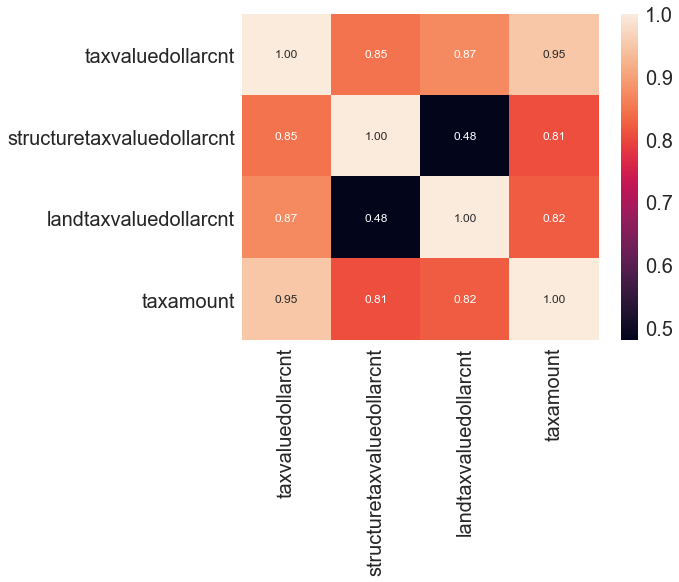

taxvaluedollarcnt             31113
structuretaxvaluedollarcnt    43545
landtaxvaluedollarcnt         56296
taxamount                     19813
dtype: int64

In [320]:
import seaborn as sns
cols = ['taxvaluedollarcnt','structuretaxvaluedollarcnt','landtaxvaluedollarcnt','taxamount']
cor_matrix = properties_2016_new[cols].corr()
mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (8,6))
sns.set(font_scale = 2)
hm = sns.heatmap(cor_matrix, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':12},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr.jpg')
plt.show()
properties_2016_new[cols].isnull().sum()

In [313]:
p1 = properties_2016_new['assessmentyear']
p1[p1.isna()] = p1.mode()[0]
properties_2016_new['assessmentyear'] = p1

<Figure size 864x864 with 0 Axes>

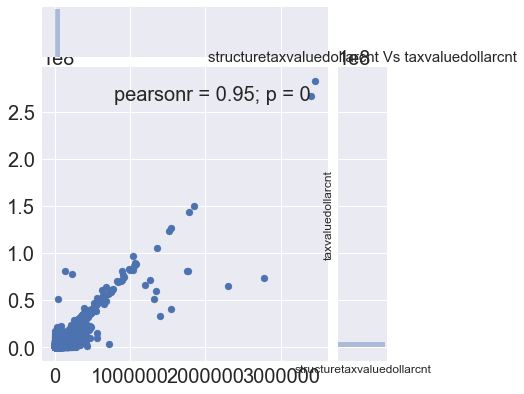

In [319]:
plt.figure(figsize=(12,12))
sns.jointplot(x=properties_2016_new.taxamount.values, y=properties_2016_new.taxvaluedollarcnt.values)
plt.ylabel('taxvaluedollarcnt', fontsize=12)
plt.xlabel('structuretaxvaluedollarcnt', fontsize=12)
plt.title("structuretaxvaluedollarcnt Vs taxvaluedollarcnt", fontsize=15)
plt.show()

In [359]:
p1 = properties_2016_new['taxvaluedollarcnt']

In [360]:
p2 = properties_2016_new['structuretaxvaluedollarcnt']

In [361]:
p3 = properties_2016_new['landtaxvaluedollarcnt']

In [362]:
p4 = properties_2016_new['taxamount']

In [363]:
p5 = p2+p3

In [372]:
pd_new = pd.concat([p1,p5],axis = 1)

In [373]:
pd_new = pd_new.diff(axis = 1)
pd_new.iloc[:,1].unique()

array([nan,  0.])

In [377]:
properties_2016_new.loc[properties_2016_new['landtaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['structuretaxvaluedollarcnt'].notna()),'landtaxvaluedollarcnt'] = properties_2016_new.loc[properties_2016_new['landtaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['structuretaxvaluedollarcnt'].notna()),'taxvaluedollarcnt'] - properties_2016_new.loc[properties_2016_new['landtaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['structuretaxvaluedollarcnt'].notna()),'structuretaxvaluedollarcnt']

In [379]:
properties_2016_new.loc[properties_2016_new['structuretaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['landtaxvaluedollarcnt'].notna()),'structuretaxvaluedollarcnt'] = properties_2016_new.loc[properties_2016_new['structuretaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['landtaxvaluedollarcnt'].notna()),'taxvaluedollarcnt'] - properties_2016_new.loc[properties_2016_new['structuretaxvaluedollarcnt'].isna() & (properties_2016_new['taxvaluedollarcnt'].notna() & properties_2016_new['landtaxvaluedollarcnt'].notna()),'landtaxvaluedollarcnt']

In [434]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

pre1  = 'landtaxvaluedollarcnt'
pre2 = 'structuretaxvaluedollarcnt'
pre3 = 'taxvaluedollarcnt'
tar = 'taxamount'

predictor= properties_2016_new[[pre1,pre2,pre3,tar]]
target = properties_2016_new[tar]

X_train = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].notna(),[pre1,pre2,pre3]].values
y_train = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].notna(),tar].values
X_test = predictor.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].isna(),[pre1,pre2,pre3]].values

X_train = StandardScaler(with_mean=True, with_std=True).fit_transform(X_train)
y_train = StandardScaler(with_mean=True, with_std=True).fit_transform(y_train.reshape(-1,1))
X_test = StandardScaler(with_mean=True, with_std=True).fit_transform(X_test)

print('begin train ......')
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

print('train mse:', mean_squared_error(y_train,y_pred_train))
print('successful')

begin train ......
train mse: 0.09792341084488876
successful


In [435]:
y_pred = y_pred.ravel()
properties_2016_new.loc[predictor[pre1].notna() & predictor[pre2].notna() & predictor[pre3].notna() & predictor[tar].isna(),tar] = y_pred

In [451]:
p1 = properties_2016_new['taxvaluedollarcnt']
p1[p1.isna()] = p1.mean()
p2 = properties_2016_new['landtaxvaluedollarcnt']
p2[p2.isna()] = p2.mean()
p3 = properties_2016_new['structuretaxvaluedollarcnt']
p3[p3.isna()] = p3.mean()

In [453]:
p4 = properties_2016_new['taxamount']
p4[p4.isna()] = p4.mean()

#### census tract and block

In [454]:
p1 = properties_2016_new['censustractandblock']

In [456]:
p1[p1.isna()] = p1.mode()[0]

#### floor 1 area

In [342]:
properties_2016_new['finishedfloor1squarefeet'] = properties_2016['finishedfloor1squarefeet']

In [352]:
stories = properties_2016_new['numberofstories'].unique()

In [354]:
for i in stories:
    p1 = properties_2016_new.loc[(properties_2016_new['finishedfloor1squarefeet'].isnull()) & (properties_2016_new['numberofstories']==i),'calculatedfinishedsquarefeet']
    p1 = p1/i   
    properties_2016_new.loc[(properties_2016_new['finishedfloor1squarefeet'].isnull()) & (properties_2016_new['numberofstories']== i),'finishedfloor1squarefeet']  = p1

In [9]:
properties_2016_new = properties_2016_new.drop('finishedfloor1squarefeet',axis = 1)
properties_2016_new = properties_2016_new.drop('fullbathcnt',axis = 1)
properties_2016_new = properties_2016_new.drop('threequarterbathnbr',axis = 1)
properties_2016_new = properties_2016_new.drop('taxdelinquencyyear',axis = 1)
properties_2016_new = properties_2016_new.drop('taxdelinquencyflag',axis = 1)
properties_2016_new = properties_2016_new.drop('finishedfloor1squarefeet',axis = 1)
properties_2016_new = properties_2016_new.drop('finishedsquarefeet12',axis = 1)

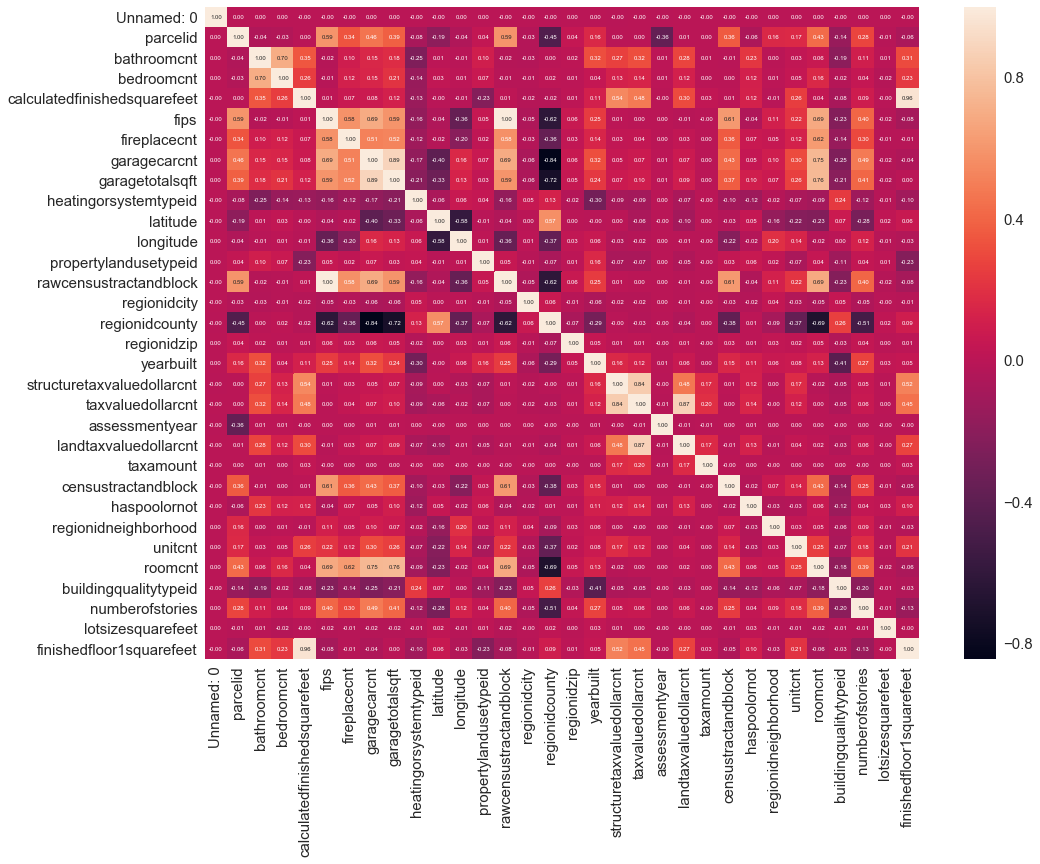

In [457]:
import seaborn as sns
cols = properties_2016_new.columns
cor_matrix = properties_2016_new.corr()
mask = np.zeros_like(cor_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (16,12))
sns.set(font_scale = 1.5)
hm = sns.heatmap(cor_matrix, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size':6},
                 yticklabels = cols,
                 xticklabels = cols)
plt.savefig('corr.jpg')
plt.show()

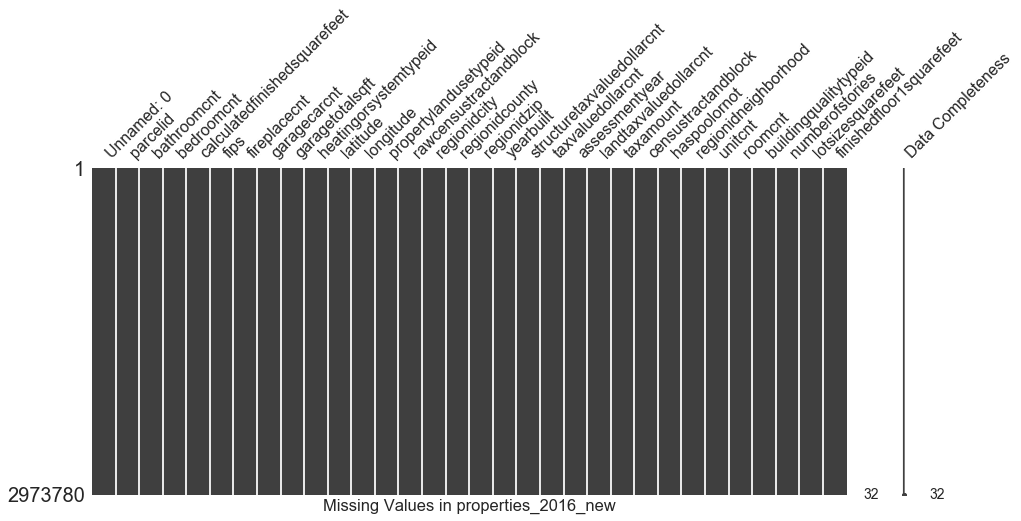

In [459]:
file = 'properties_2016_new'
msno.matrix(df=eval(file), figsize=(15,6),labels= True)
plt.xlabel('Missing Values in ' + file)
plt.show()

In [458]:
properties_2016_new.isnull().sum()

Unnamed: 0                      0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fireplacecnt                    0
garagecarcnt                    0
garagetotalsqft                 0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
haspoolornot                    0
regionidneighborhood            0
unitcnt                         0
roomcnt                         0
buildingqualitytypeid           0
numberofstorie

#### Feature Dropped

In [460]:
properties_dis = properties_2016_new.describe()
properties_dis

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,...,taxamount,censustractandblock,haspoolornot,regionidneighborhood,unitcnt,roomcnt,buildingqualitytypeid,numberofstories,lotsizesquarefeet,finishedfloor1squarefeet
count,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,...,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06,2.973780e+06
mean,1.486890e+06,1.296527e+07,2.209141e+00,3.088948e+00,1.821417e+03,6.048032e+03,1.228679e-01,5.416177e-01,1.139865e+02,3.222207e+00,...,5.354763e+03,6.048206e+13,1.864539e-01,2.946327e+05,1.701036e+00,1.475002e+00,5.445878e+00,1.157734e+00,2.282281e+04,1.652133e+03
std,8.584565e+05,2.648246e+06,1.077749e+00,1.275856e+00,1.806835e+03,2.023278e+01,3.884191e-01,8.971246e-01,2.205555e+02,2.748691e+00,...,2.001868e+08,3.217654e+11,3.894726e-01,2.547948e+05,2.214633e+00,2.840391e+00,1.829725e+00,3.812631e-01,3.222197e+05,1.756916e+03
min,0.000000e+00,1.071172e+07,0.000000e+00,0.000000e+00,1.000000e+00,6.037000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,-2.418462e+08,-1.000000e+00,0.000000e+00,6.952000e+03,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00
25%,7.434448e+05,1.164124e+07,2.000000e+00,2.000000e+00,1.218000e+03,6.037000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,2.447540e+03,6.037401e+13,0.000000e+00,4.857000e+04,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,5.865000e+03,1.106000e+03
50%,1.486890e+06,1.254008e+07,2.000000e+00,3.000000e+00,1.561000e+03,6.037000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,...,3.988740e+03,6.037574e+13,0.000000e+00,2.732630e+05,1.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,7.280000e+03,1.440000e+03
75%,2.230334e+06,1.409045e+07,3.000000e+00,4.000000e+00,2.124000e+03,6.059000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,...,6.185140e+03,6.059042e+13,0.000000e+00,4.031900e+05,2.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,1.324700e+04,1.903000e+03
max,2.973779e+06,1.661471e+08,2.000000e+01,2.000000e+01,9.525760e+05,6.111000e+03,9.000000e+00,2.500000e+01,7.749000e+03,2.400000e+01,...,2.136036e+11,4.830301e+14,1.000000e+00,7.641670e+05,9.970000e+02,9.600000e+01,1.200000e+01,4.100000e+01,3.282638e+08,9.525760e+05


### Saving data

In [461]:
merged_2016 = pd.merge(train_2016,properties_2016_new,on="parcelid",how="left")
#merged_2017 = pd.merge(train_2017,properties_2017,on="parcelid",how="left")

In [462]:
merged_2016.to_csv('./zillow data/merged_new2016.csv')

In [58]:
merged_2017_new.to_csv('./zillow data/merged_drop_new2017.csv')

In [ ]:
properties_2016_new.to_csv('./zillow data/properties_2016_new.csv')